In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
import numpy as np

C:\noklab\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
irr_machine = pd.read_csv('irrigation_machine.csv')
irr_machine.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [5]:
# Import the sequential model and dense layer
import keras
from keras.models import Sequential
from keras.layers import Dense

# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [12]:
parcels = irr_machine[['parcel_0','parcel_1','parcel_2']]
sensors= irr_machine.drop(['parcel_0','parcel_1','parcel_2','Unnamed: 0'], axis=1)
sensors_train,sensors_test,parcels_train,parcels_test = train_test_split(sensors, parcels, test_size=0.3)

In [26]:
# Train for 100 epochs using a validation split of 0.5
history = model.fit(sensors_train, parcels_train, epochs=100, validation_data=(sensors_test, parcels_test), validation_split=0.5)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Train on 1400 samples, validate on 600 samples
Epoch 1/100
1400/1400 [==============================] - 0s 102us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1156 - val_acc: 0.8850
Epoch 2/100
1400/1400 [==============================] - 0s 104us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1168 - val_acc: 0.8828
Epoch 3/100
1400/1400 [==============================] - 0s 105us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1165 - val_acc: 0.8833
Epoch 4/100
1400/1400 [==============================] - 0s 109us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1127 - val_acc: 0.8861
Epoch 5/100
1400/1400 [==============================] - 0s 100us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1146 - val_acc: 0.8861
Epoch 6/100
1400/1400 [==============================] - 0s 112us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1163 - val_acc: 0.8856
Epoch 7/100
1400/1400 [==============================] - 0s 106us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1162 - val_acc: 0

Epoch 60/100
1400/1400 [==============================] - 0s 110us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1305 - val_acc: 0.8822
Epoch 61/100
1400/1400 [==============================] - 0s 122us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1344 - val_acc: 0.8844
Epoch 62/100
1400/1400 [==============================] - 0s 124us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1337 - val_acc: 0.8833
Epoch 63/100
1400/1400 [==============================] - 0s 108us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1298 - val_acc: 0.8844
Epoch 64/100
1400/1400 [==============================] - 0s 99us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 1.1555 - val_acc: 0.8806
Epoch 65/100
1400/1400 [==============================] - 0s 102us/step - loss: 0.0446 - acc: 0.9907 - val_loss: 1.1638 - val_acc: 0.8833
Epoch 66/100
1400/1400 [==============================] - 0s 98us/step - loss: 0.0438 - acc: 0.9910 - val_loss: 1.1770 - val_acc: 0.8817
Epoch 67/100
1400/1400 [============

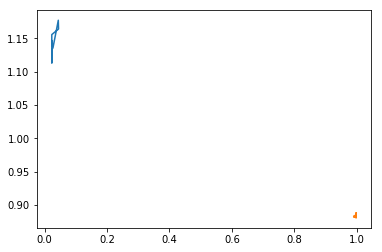

In [27]:
# Plot train vs test loss during training
plt.plot(history.history['loss'], history.history['val_loss'])

# Plot train vs test accuracy during training
plt.plot(history.history['acc'], history.history['val_acc'])
plt.show()